# Capabilities

Uses data from csv of chrome extension: https://chrome.google.com/webstore/detail/webtime-tracker/ppaojnbmmaigjmlpjaldnkgnklhicppk

  - Create a group of websites to be evaluted as one
  - For any website or group,
      - View total time spent on it
      - Graph usage for every day
      - Plot regression between sites
      - Graph usage for months
      - Graph usage culmulatively
      - Group usage by aggregated day of week
      - Compare usage by aggregated day of week
      - View calendar heatmap of usage
      - View days with exceptional high usage
      - Graph rolling average usage by day
  - Graph total chrome usage everyday

In [64]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# The Data

In [65]:
wtt = pd.read_csv('Webtime3.csv')
wtt

,Domain,2021-07-12,2021-07-12.1,2021-07-13,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,...,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05
0,%20https,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0redirc.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,104.128.53.29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12ft.io,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,160592857366.free.fr,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,zackrauen.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2242,zapier.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2243,zety.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,76,0
2244,zonechin48.tumblr.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create 'Total' column, remove <5m sites, Categories function

In [66]:
wtt = pd.read_csv('Webtime3.csv')
wtt = wtt.pivot_table(index='Domain')

def addnew(name,sites):
    wtt.loc[name] = 0
    for i in sites:
        wtt.loc[name] += wtt.loc[i]
    wtt.sort_values('Total',ascending=False,inplace=True)
    return wtt.sort_values('Total',ascending=False).head(10)
    
def top(n):
    return wtt.head(n).index

wtt['Total'] = 0

for i in wtt.index:
    wtt.loc[i,'Total'] = wtt.loc[i].sum(axis=0)

#wtt = wtt[wtt>60].dropna(thresh=30,axis=0) # more than 30 days where at least a minute has been spent on this site
wtt = wtt[wtt['Total'] >= 60*5]/3600 #convert graph to hours and remove less than 5 minute totals
wtt.sort_values('Total',ascending=False,inplace=True)
wtt.head(3) #Shows top 10

,2021-07-12,2021-07-12.1,2021-07-13,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,...,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,Total
Domain,,,,,,,,,,,,,,,,,,,,,
www.youtube.com,0.075000,0.075000,0.910278,1.178056,0.413889,0.375000,0.311111,0.273611,0.158333,0.775278,...,0.00,0.026111,0.490556,0.000000,0.0,0.0,0.0,0.135556,0.022500,248.699167
docs.google.com,0.088056,0.088056,0.237500,0.060000,0.136111,0.067222,0.228333,0.010556,0.015278,0.033611,...,0.01,0.000000,0.011944,0.162778,0.0,0.0,0.0,3.438056,0.704444,124.090833
utexas.zoom.us,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.001944,0.0,0.0,0.0,0.000000,0.000000,66.957222


In [67]:
# Add new categories
addnew('Other',['www.youtube.com','www.chess.com','slither.io','www.reddit.com'])
addnew('TV',['www.hulu.com','www.netflix.com','beta.crunchyroll.com'])
addnew('all.school',['utexas.zoom.us','docs.google.com','utexas.instructure.com','lecturecapture.la.utexas.edu',
                    'www.chegg.com'])

,2021-07-12,2021-07-12.1,2021-07-13,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,...,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,Total
Domain,,,,,,,,,,,,,,,,,,,,,
Other,0.106389,0.106389,1.154444,1.879722,0.626944,0.603333,0.502500,0.273611,0.765833,0.803611,...,0.000000,0.026111,0.490556,0.027222,0.0,0.0,0.000000,0.960833,0.201944,347.308056
all.school,0.088056,0.088056,0.237500,0.060000,0.136111,0.067222,0.228333,0.010556,0.015278,0.033611,...,0.010000,0.000000,0.014722,0.168611,0.0,0.0,0.021667,3.438056,0.704444,271.466667
www.youtube.com,0.075000,0.075000,0.910278,1.178056,0.413889,0.375000,0.311111,0.273611,0.158333,0.775278,...,0.000000,0.026111,0.490556,0.000000,0.0,0.0,0.000000,0.135556,0.022500,248.699167
docs.google.com,0.088056,0.088056,0.237500,0.060000,0.136111,0.067222,0.228333,0.010556,0.015278,0.033611,...,0.010000,0.000000,0.011944,0.162778,0.0,0.0,0.000000,3.438056,0.704444,124.090833
utexas.zoom.us,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001944,0.0,0.0,0.000000,0.000000,0.000000,66.957222
utexas.instructure.com,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001667,0.003889,0.0,0.0,0.021667,0.000000,0.000000,63.491944
TV,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316389,0.240556,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.553889,0.731111,0.686944,56.013056
www.chess.com,0.031389,0.031389,0.244167,0.610556,0.000000,0.045000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.032500,51.699722
www.hulu.com,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316389,0.240556,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.653611,0.686944,35.832222


# Graphing Every Day

In [68]:
wtt3 = wtt.drop('Total',axis=1)
# wtt3 here is wtt without the Totals column
def grapheveryday(sites):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0,0,1,1])
    for i in sites:
        ax.plot(wtt3.columns,wtt3.loc[i],label=i)
    ax.legend(bbox_to_anchor=(1, 1))
#ax.plot(wtt3.columns,wtt3.loc['www.youtube.com'],color='red',lw = 1)

def grapheverydaytop(n):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0,0,1,1])
    for i in np.arange(0,n): # Graph the top 
        ax.plot(wtt3.columns,wtt3.iloc[i],label=wtt3.index[i])
    ax.legend(bbox_to_anchor=(1, 1))


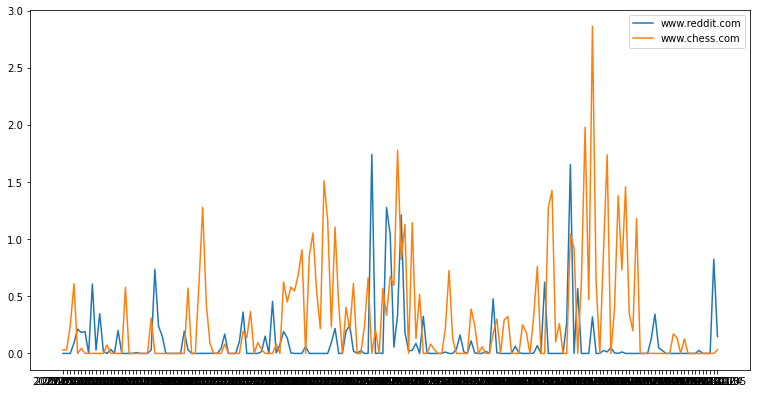

In [69]:
grapheveryday(['www.reddit.com','www.chess.com'])
# grapheveryday(top(5))

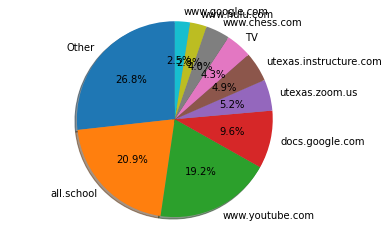

In [70]:
fig1, ax1 = plt.subplots()
ax1.pie(wtt.head(10)['Total'], 
        labels=wtt.head(10).index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

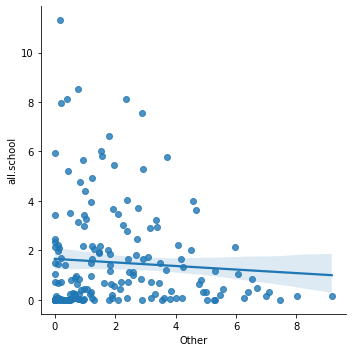

In [71]:
sns.lmplot(x='Other', y='all.school',data=wtt3.transpose())

# Groupby Months

In [72]:
wtt2 = wtt.copy().drop('Total',axis=1)

for i in wtt2.columns:
    wtt2.rename({i:i[0:7]},axis=1, inplace = True)

wtt2 = wtt2.groupby(wtt2.columns, axis=1).apply(lambda g: g.sum(axis=1))

def graphmonths(sites):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0,0,1,1])
    for i in sites:
        ax.plot(wtt2.columns,wtt2.loc[i],label=i)
    ax.legend(bbox_to_anchor=(1, 1))

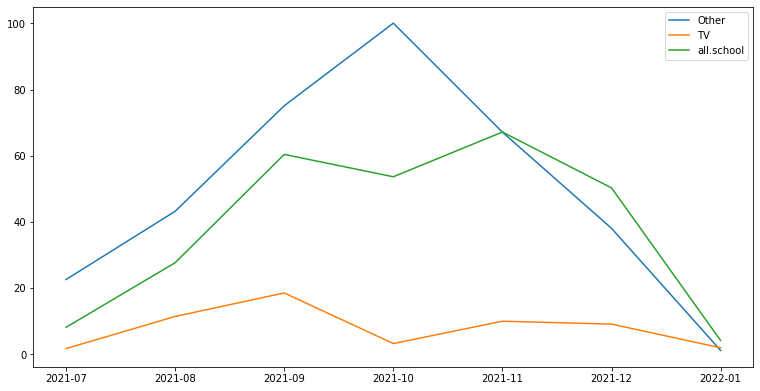

In [73]:
graphmonths(['Other','TV','all.school'])
# graphmonths(top(5))

# Culmulative Tracking

In [74]:
wtt4 = wtt3.copy()
#wtt4['2021-07-12']['www.youtube.com'] = 5
for i in np.arange(1,wtt4.columns.size):
    for k in np.arange(0,wtt4.index.size):
        wtt4[wtt4.columns[i]][wtt4.index[k]] = wtt4[wtt4.columns[i-1]][wtt4.index[k]] + wtt4[wtt4.columns[i]][wtt4.index[k]]
#wtt4 = wtt.sort_values('Total',ascending=False).drop('Total',axis=1)
#ax.plot(wtt3.columns,wtt3.loc['www.youtube.com'],color='red',lw = 1)


def graphculm(sites):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0,0,1,1])
    for i in sites:
        ax.plot(wtt4.columns,wtt4.loc[i],label=i)
    ax.legend(bbox_to_anchor=(1, 1))


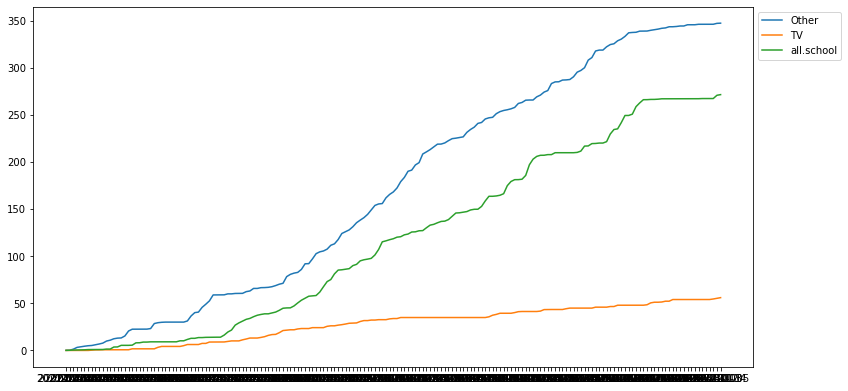

In [75]:
graphculm(['Other','TV','all.school'])
# graphculm(top(5))

# Groupby Day of Week

In [76]:
wtt5 = wtt3.copy()
wtt5.loc['Weekday'] = 'Monday'
for i in np.arange(2,wtt5.columns.size):
    wtt5[wtt5.columns[i]]['Weekday'] = pd.Timestamp(wtt5.columns[i]).day_name()

wtt6 = wtt5.copy()

for i in np.arange(0,wtt6.columns.size):
    wtt6.rename({wtt6.columns[i]:wtt6.loc['Weekday'][i]},axis=1, inplace = True)

wtt6 = wtt6.groupby(wtt6.columns, axis=1, sort = False).apply(lambda g: g.sum(axis=1))
wtt6.drop('Weekday',inplace=True)

def graphdays(sites):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0,0,1,1])
    for i in sites:
        ax.plot(wtt6.columns,wtt6.loc[i],label=i)
    ax.legend(bbox_to_anchor=(1, 1))

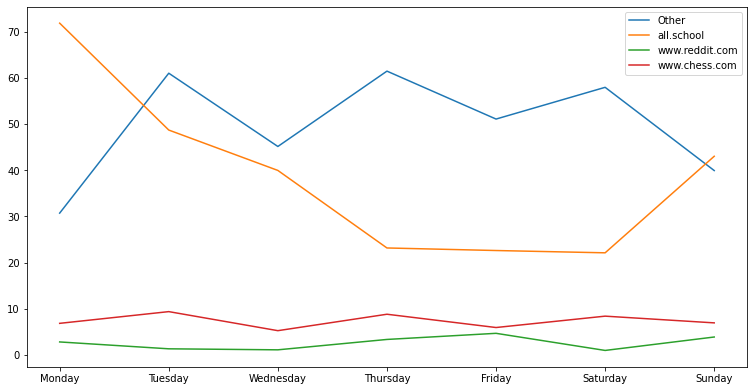

In [77]:
graphdays(['Other','all.school','www.reddit.com','www.chess.com'])

<AxesSubplot:xlabel='Weekday', ylabel='Other'>

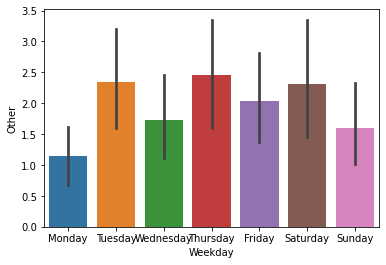

In [78]:
sns.barplot(x='Weekday',y='Other',data=wtt5.transpose())

# Compare stats by day of week

<Figure size 720x360 with 0 Axes>

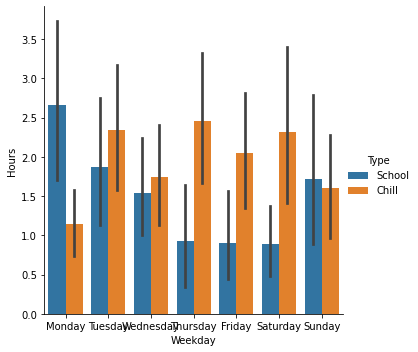

In [79]:
plt.figure(figsize=(10,5))
sns.catplot(x='Weekday',y='Hours',data=wtt7b,hue='Type',kind='bar')

<Figure size 720x360 with 0 Axes>

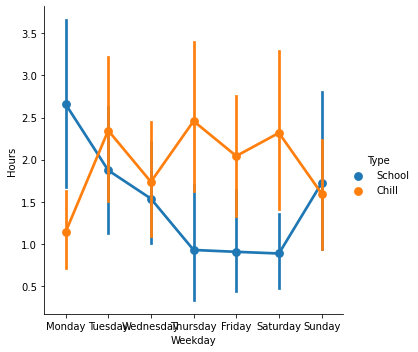

In [80]:
plt.figure(figsize=(10,5))
sns.catplot(x='Weekday',y='Hours',data=wtt7b,hue='Type',kind='point')

<AxesSubplot:xlabel='Weekday', ylabel='Hours'>

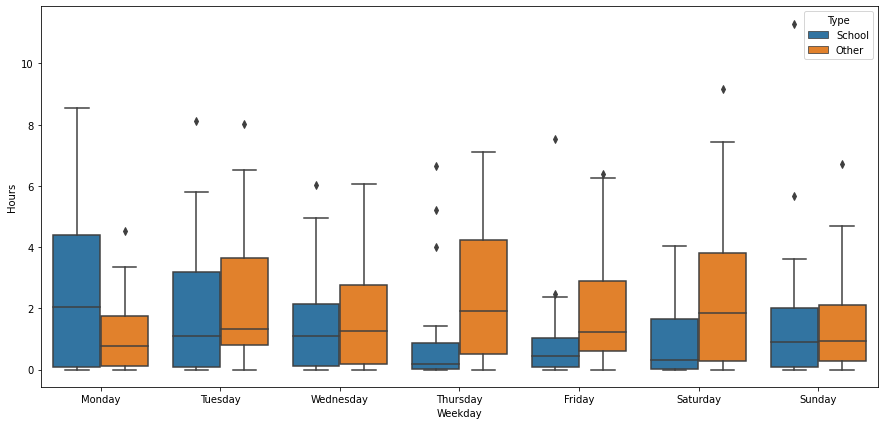

In [81]:
wtt7 = wtt5.copy()
plt.figure(figsize=(15,7))

wtt7s = wtt7.copy().transpose()[['all.school','Weekday']]
wtt7s['Type'] = 'School'
wtt7s.rename(columns={'all.school': 'Hours'}, inplace=True)

wtt7c = wtt7.copy().transpose()[['Other','Weekday']]
wtt7c['Type'] = 'Other'
wtt7c.rename(columns={'Other': 'Hours'}, inplace=True)
wtt7c

wtt7b = pd.concat([wtt7s,wtt7c],axis=0)
sns.boxplot(x='Weekday',y='Hours',data=wtt7b,hue = 'Type')

# Calendar Heatmap

In [82]:
import calplot

(<Figure size 900x244.8 with 3 Axes>, array([<AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>],
      dtype=object))
(<Figure size 900x244.8 with 3 Axes>, array([<AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>],
      dtype=object))


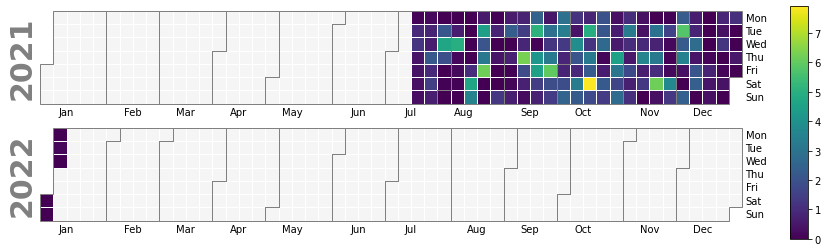

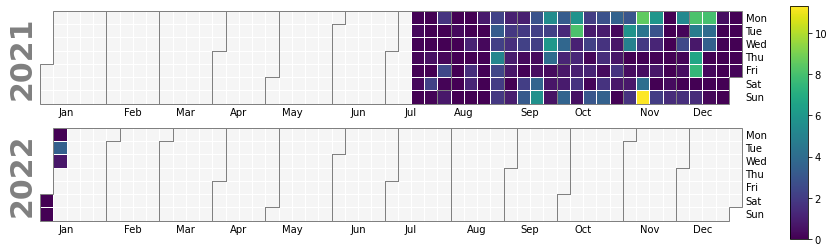

In [83]:
wtt8 = wtt3.transpose().drop('2021-07-12.1')
wtt8['y-s'] = wtt8['www.youtube.com'] - wtt8['all.school']


wtt8.index = pd.to_datetime(wtt8.index, yearfirst=True)
wtt8

print(calplot.calplot(wtt8['www.youtube.com'], how='sum'))
print(calplot.calplot(wtt8['all.school'], how='sum'))

# Binges

In [84]:
wtt8[wtt8['all.school'] > 8]

Domain,Other,all.school,www.youtube.com,docs.google.com,utexas.zoom.us,utexas.instructure.com,TV,www.chess.com,www.hulu.com,www.google.com,...,www.anonymousforthevoiceless.org,www.hilton.com,login.globalsuite.net,www.when2meet.com,www.surveymonkey.com,myaccount.google.com,villario.com,onlinemediamasters.com,www.galaxytheatres.com,y-s
2021-10-05,0.415556,8.106944,0.413056,4.990278,0.964444,2.152222,0.0000,0.000000,0.000000,0.085000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.693889
2021-11-08,0.774722,8.545833,0.336667,4.741111,2.603056,1.201667,0.0000,0.294722,0.000000,0.244444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.209167
2021-11-14,0.185556,11.303333,0.000000,0.125833,10.841111,0.336389,0.0000,0.185556,0.000000,0.007500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11.303333
2021-12-06,2.360556,8.110556,0.608611,3.745278,0.121389,2.253333,0.6775,1.738611,0.665278,0.056944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.501944


# Rolling Averages

In [85]:
wtt9 = wtt8.copy()
x = 15 #Rolling average of radius x

for i in np.arange(x,wtt9.index.size-x):
    for k in np.arange(0,wtt9.columns.size):
        temp = 0
        for e in np.arange(-x,x+1):
            temp += wtt8.iloc[i+e][k]
        wtt9.iloc[i][k] = temp/(2*x+1)
    
wtt9.head(5)

wtt10 = wtt9.transpose()

def graphravg(sites):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0,0,1,1])
    for i in sites: # Graph the top 
        ax.plot(wtt10.columns,wtt10.loc[i],label=i)
    ax.legend(bbox_to_anchor=(1, 1))

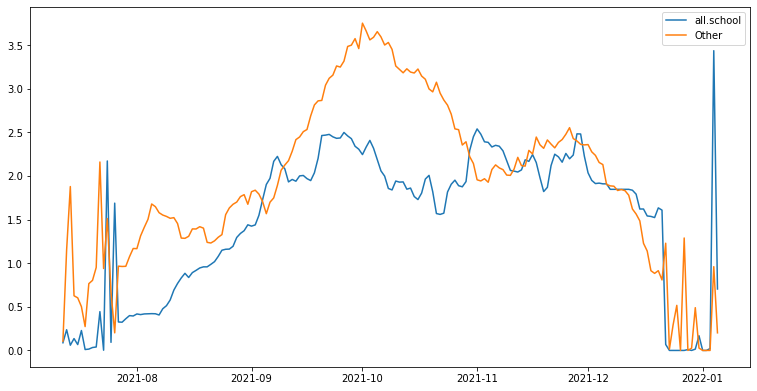

In [86]:
graphravg(['all.school','Other'])

# Daily Totals

In [90]:
wtt11 = wtt8.copy().drop('y-s',axis = 1)

wtt11['DTotals'] = 0
for i in np.arange(0,wtt11.index.size):
    wtt11['DTotals'][i] = wtt8.drop('y-s',axis = 1).iloc[i].sum()
wtt11

C:\Users\Alexd\AppData\Local\Temp/ipykernel_13292/751971622.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtt11['DTotals'][i] = wtt8.drop('y-s',axis = 1).iloc[i].sum()


Domain,Other,all.school,www.youtube.com,docs.google.com,utexas.zoom.us,utexas.instructure.com,TV,www.chess.com,www.hulu.com,www.google.com,...,www.anonymousforthevoiceless.org,www.hilton.com,login.globalsuite.net,www.when2meet.com,www.surveymonkey.com,myaccount.google.com,villario.com,onlinemediamasters.com,www.galaxytheatres.com,DTotals
2021-07-12,0.106389,0.088056,0.075000,0.088056,0.0,0.000000,0.000000,0.031389,0.000000,0.038889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2021-07-13,1.154444,0.237500,0.910278,0.237500,0.0,0.000000,0.000000,0.244167,0.000000,1.296111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2021-07-14,1.879722,0.060000,1.178056,0.060000,0.0,0.000000,0.000000,0.610556,0.000000,0.218056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2021-07-15,0.626944,0.136111,0.413889,0.136111,0.0,0.000000,0.000000,0.000000,0.000000,0.081667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2021-07-16,0.603333,0.067222,0.375000,0.067222,0.0,0.000000,0.000000,0.045000,0.000000,0.210278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2022-01-02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2022-01-03,0.000000,0.021667,0.000000,0.000000,0.0,0.021667,0.553889,0.000000,0.000000,0.015556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-04,0.960833,3.438056,0.135556,3.438056,0.0,0.000000,0.731111,0.000000,0.653611,0.511944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13


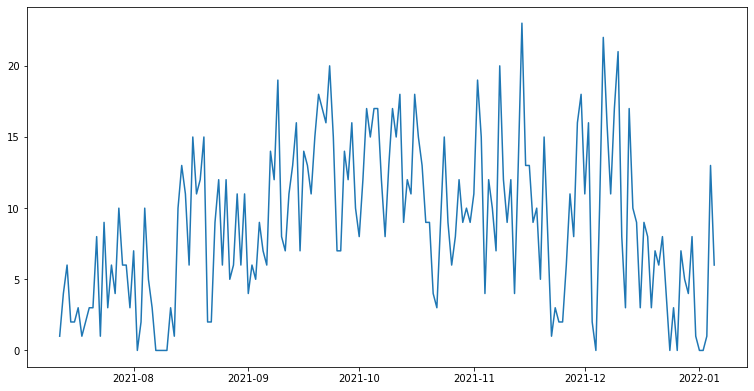

In [91]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

ax.plot(wtt11.index,wtt11['DTotals'])


(160.0, 172.0)

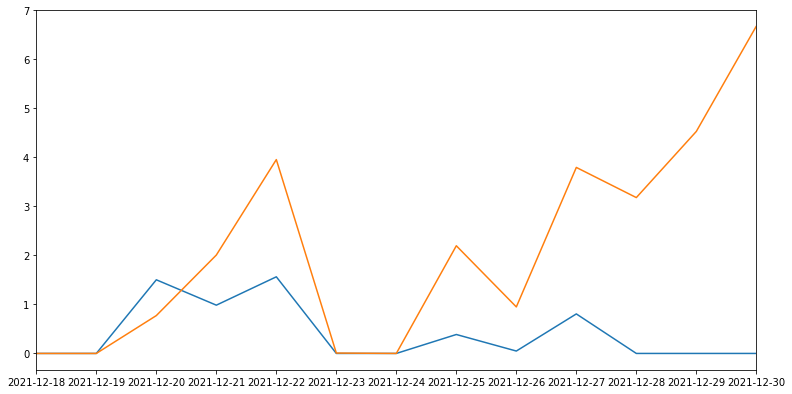

In [98]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
#ax.plot(wtt2o.columns,wtt2o.iloc[0])
ax.plot(wtt4.columns,wtt3.loc['www.udemy.com'])
ax.plot(wtt4.columns,wtt3.loc['localhost'])

ax.set_xlim([160,172])